In [12]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
(train_image,train_lable),(test_image,test_label) = tf.keras.datasets.fashion_mnist.load_data() # 加载fashion_mnist数据

In [14]:
train_image.shape

(60000, 28, 28)

In [15]:
train_lable.shape

(60000,)

In [16]:
test_image.shape,test_label.shape

((10000, 28, 28), (10000,))

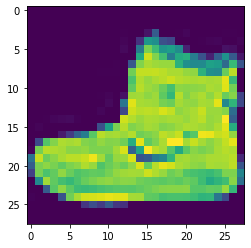

In [17]:
plt.imshow(train_image[0])

In [18]:
np.max(train_image[0]) # 显示最大值

255

In [21]:
train_lable

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [22]:
train_image = train_image/255 # 归一化
test_image = test_image/255

In [26]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) # <输入层>Flatten层将二维数据扁平成一维数据（向量）
model.add(tf.keras.layers.Dense(128,activation='relu'))  # <隐含层>Dense层只能处理一维张量
model.add(tf.keras.layers.Dense(10,activation='softmax')) # <输出层>输出10个概率值,使用softmax进行激活

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc']) #配置模型

In [29]:
model.fit(train_image,train_lable,epochs=5) #训练模型

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4961 - acc: 0.8259
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3800 - acc: 0.8623
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3408 - acc: 0.8761
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3137 - acc: 0.8853
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2962 - acc: 0.8908


In [31]:
model.evaluate(test_image,test_label) # 用测试数据集对模型进行评价

313/313 [==============================] - 2s 5ms/step - loss: 0.3618 - acc: 0.8714


[0.361775666475296, 0.871399998664856]

In [33]:
train_label_onehot = tf.keras.utils.to_categorical(train_lable) # 对train_lable进行读热编码

In [35]:
train_label_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [36]:
train_label_onehot[-1]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [37]:
test_label_onehot = tf.keras.utils.to_categorical(test_label) # 对test_label进行读热编码

In [38]:
test_label_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [47]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['acc']) #配置模型

In [53]:
model.fit(train_image,train_label_onehot,epochs=5,batch_size=1) #训练模型batch_size配置大小

Epoch 1/5
60000/60000 [==============================] - 150s 3ms/step - loss: 1.0153 - acc: 0.6775
Epoch 2/5
60000/60000 [==============================] - 173s 3ms/step - loss: 1.0695 - acc: 0.6793
Epoch 3/5
60000/60000 [==============================] - 161s 3ms/step - loss: 1.0573 - acc: 0.6700
Epoch 4/5
60000/60000 [==============================] - 156s 3ms/step - loss: 1.0842 - acc: 0.6697
Epoch 5/5
60000/60000 [==============================] - 180s 3ms/step - loss: 1.0877 - acc: 0.6716


In [52]:
predict = model.predict(test_image)

In [43]:
predict.shape

(10000, 10)

In [44]:
predict[0]

array([6.1437873e-08, 4.2766481e-11, 9.7693036e-09, 9.7430986e-10,
       1.6041974e-09, 6.7893787e-05, 1.1549231e-08, 2.0822030e-03,
       3.2735210e-07, 9.9784946e-01], dtype=float32)

In [45]:
np.argmax(predict[0]) # 取出最大值对应的索引

9

In [54]:
test_label[0]

9

In [64]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) # <输入层>Flatten层将二维数据扁平成一维数据（向量）
model.add(tf.keras.layers.Dense(128,activation='relu'))  # <隐含层>Dense层只能处理一维张量
model.add(tf.keras.layers.Dense(128,activation='relu'))  # <隐含层>Dense层只能处理一维张量
model.add(tf.keras.layers.Dense(128,activation='relu'))  # <隐含层>Dense层只能处理一维张量
model.add(tf.keras.layers.Dense(10,activation='softmax')) # <输出层>输出10个概率值,使用softmax进行激活

In [65]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['acc']) #配置模型

In [69]:
history = model.fit(train_image,train_label_onehot,epochs=10,validation_data=(test_image,test_label_onehot)) #添加验证数据验证每一次epoch

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2272 - acc: 0.9127 - val_loss: 0.3335 - val_acc: 0.8871
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2202 - acc: 0.9158 - val_loss: 0.3382 - val_acc: 0.8851
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2137 - acc: 0.9187 - val_loss: 0.3376 - val_acc: 0.8819
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2066 - acc: 0.9203 - val_loss: 0.3392 - val_acc: 0.8889
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2032 - acc: 0.9211 - val_loss: 0.3347 - val_acc: 0.8896
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1941 - acc: 0.9256 - val_loss: 0.3677 - val_acc: 0.8846
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1899 - acc: 0.9266 - val_loss: 0.3819 - val_acc: 0.8873
Epoch 8/10
1875/1875 [==============================] - 8s 

In [70]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

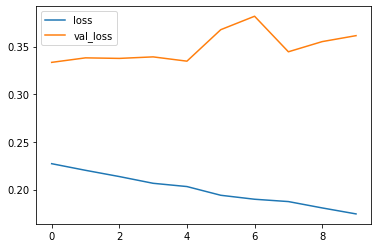

In [72]:
plt.plot(history.epoch,history.history.get('loss'),label='loss')
plt.plot(history.epoch,history.history.get('val_loss'),label='val_loss')
plt.legend()

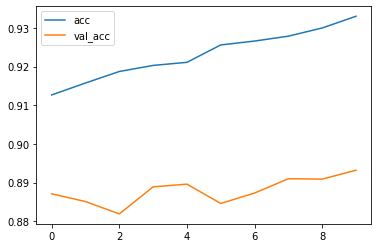

In [73]:
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')
plt.legend()

In [79]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) # <输入层>Flatten层将二维数据扁平成一维数据（向量）
model.add(tf.keras.layers.Dense(128,activation='relu'))  # <隐含层>Dense层只能处理一维张量
model.add(tf.keras.layers.Dropout(0.5)) # 添加一个Dropout层，丢弃50%的单元数
model.add(tf.keras.layers.Dense(128,activation='relu'))  # <隐含层>Dense层只能处理一维张量
model.add(tf.keras.layers.Dropout(0.5)) # 丢弃50%的单元数
model.add(tf.keras.layers.Dense(128,activation='relu'))  # <隐含层>Dense层只能处理一维张量
model.add(tf.keras.layers.Dropout(0.5)) # 丢弃50%的单元数
model.add(tf.keras.layers.Dense(10,activation='softmax')) # <输出层>输出10个概率值,使用softmax进行激活

In [80]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['acc']) #配置模型使用交叉熵损失函数

In [81]:
history = model.fit(train_image,train_label_onehot,epochs=10,validation_data=(test_image,test_label_onehot)) #添加验证数据验证每一次epoch

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8813 - acc: 0.6713 - val_loss: 0.5397 - val_acc: 0.8061
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6223 - acc: 0.7802 - val_loss: 0.4869 - val_acc: 0.8199
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5746 - acc: 0.7977 - val_loss: 0.4609 - val_acc: 0.8354
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5500 - acc: 0.8056 - val_loss: 0.4650 - val_acc: 0.8344
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5313 - acc: 0.8118 - val_loss: 0.4364 - val_acc: 0.8443
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5182 - acc: 0.8167 - val_loss: 0.4242 - val_acc: 0.8467
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5070 - acc: 0.8228 - val_loss: 0.4096 - val_acc: 0.8523
Epoch 8/10
1875/1875 [==============================] - 10s

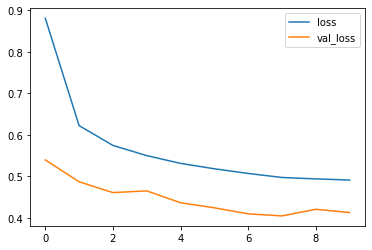

In [82]:
plt.plot(history.epoch,history.history.get('loss'),label='loss')
plt.plot(history.epoch,history.history.get('val_loss'),label='val_loss')
plt.legend()

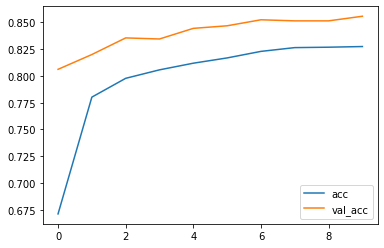

In [83]:
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')
plt.legend()

In [84]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) # <输入层>Flatten层将二维数据扁平成一维数据（向量）
model.add(tf.keras.layers.Dense(32,activation='relu'))  # <隐含层>Dense层只能处理一维张量
model.add(tf.keras.layers.Dense(10,activation='softmax')) # <输出层>输出10个概率值,使用softmax进行激活

In [85]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['acc']) #配置模型

In [86]:
history = model.fit(train_image,train_label_onehot,epochs=10,validation_data=(test_image,test_label_onehot)) #添加验证数据验证每一次epoch

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5449 - acc: 0.8129 - val_loss: 0.4562 - val_acc: 0.8391
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4124 - acc: 0.8546 - val_loss: 0.4572 - val_acc: 0.8312
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3755 - acc: 0.8651 - val_loss: 0.3975 - val_acc: 0.8550
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3528 - acc: 0.8725 - val_loss: 0.3859 - val_acc: 0.8624
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3357 - acc: 0.8794 - val_loss: 0.4072 - val_acc: 0.8550
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3230 - acc: 0.8818 - val_loss: 0.4216 - val_acc: 0.8503
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3117 - acc: 0.8877 - val_loss: 0.3686 - val_acc: 0.8688
Epoch 8/10
1875/1875 [==============================] - 5s 3ms

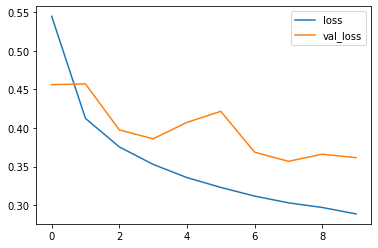

In [87]:
plt.plot(history.epoch,history.history.get('loss'),label='loss')
plt.plot(history.epoch,history.history.get('val_loss'),label='val_loss')
plt.legend()

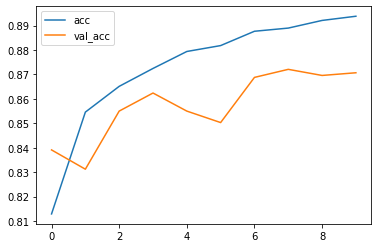

In [88]:
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')
plt.legend()